In [1]:
import os
EXAMPLE_DIR = os.getcwd()
os.chdir(os.path.join('..', '..'))
PROJECT_DIR = os.getcwd()
print('EXAMPLE_DIR: ', EXAMPLE_DIR)
print('PROJECT_DIR: ', PROJECT_DIR)

EXAMPLE_DIR:  /Users/kandai/Documents/projects/research/regret_synthesis_toolbox/examples/Fish_and_Shipwreck
PROJECT_DIR:  /Users/kandai/Documents/projects/research/regret_synthesis_toolbox


In [2]:
%load_ext autoreload
%autoreload 2
import gym
from IPython.display import Video, display

import sys
import time
import numpy as np
from pathlib import Path

sys.path.append(os.path.join(PROJECT_DIR, 'src'))
from src.graph import Graph
from src.graph import graph_factory
from src.config import ROOT_PATH
from src.strategy_synthesis import MultiObjectiveSolver
from src.simulation.simulator import Simulator

sys.path.append(os.path.join(PROJECT_DIR, 'wombats'))
from wombats.systems.minigrid import GYM_MONITOR_LOG_DIR_NAME
from wombats.systems.minigrid import DynamicMinigrid2PGameWrapper, MultiAgentMiniGridEnv

DIR = EXAMPLE_DIR
Graph.graph_dir = DIR

In [3]:
debug = True

# env_id = 'MiniGrid-FourGrids-v0'
# env_id = 'MiniGrid-ChasingAgent-v0'
# env_id = 'MiniGrid-ChasingAgentInSquare4by4-v0'
# env_id = 'MiniGrid-ChasingAgentInSquare3by3-v0'
env_id = 'MiniGrid-ChasingAgentIn4Square-v0'
pdfa_config_yaml="config/PDFA_Fish_and_Shipwreck"
player_steps = {'sys': [1, 2], 'env': [1]}

load_game_from_file = False
plot_minigrid = False
plot_pdfa = True
plot_product = False
finite = True
view = True
save_flag = True
format = 'png'

stochastic = False
adversarial = True
plot_strategies=False
plot_graph_with_strategy = False
plot_graph_with_pareto = False
plot_pareto = True
speedup = True

env_filename = os.path.join(DIR, 'plots', 'gym_env.png')
Path(os.path.split(env_filename)[0]).mkdir(parents=True, exist_ok=True)
env_dpi = 300

In [4]:
# PDFA
pdfa = graph_factory.get(
    'PDFA',
    graph_name="pdfa",
    config_yaml=pdfa_config_yaml,
    save_flag=save_flag,
    plot=plot_pdfa,
    view=view,
    format=format)

[Errno 2] No such file or directory: '/Users/kandai/Documents/projects/research/regret_synthesis_toolbox/examples/Fish_and_Shipwreck/config/PDFA_Fish_and_Shipwreck.yaml'
The file config/PDFA_Fish_and_Shipwreck.yaml does not exist


UnboundLocalError: local variable 'graph_data' referenced before assignment

/Users/kandai/.pyenv/versions/anaconda3-5.3.0/envs/adam_can_play_any_strategy/lib/python3.8/site-packages/gym/wrappers/monitor.py:31: UserWarning: The Monitor wrapper is being deprecated in favor of gym.wrappers.RecordVideo and gym.wrappers.RecordEpisodeStatistics (see https://github.com/openai/gym/issues/2297)
  warnings.warn(


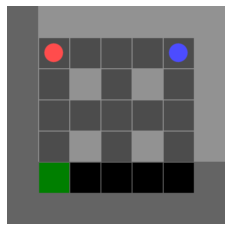

In [5]:

# OpenAI Minigrid Env
env = gym.make(env_id)
env = DynamicMinigrid2PGameWrapper(
        env,
        player_steps=player_steps,
        monitor_log_location=os.path.join(DIR, GYM_MONITOR_LOG_DIR_NAME))
env.reset()
env.render_notebook(env_filename, env_dpi)

In [6]:
file_name = env_id + 'Game'
filepath = os.path.join(DIR, 'config', file_name)
config_yaml = os.path.relpath(filepath, ROOT_PATH)

# Game Construction
start = time.time()
two_player_graph = graph_factory.get('TwoPlayerGraph',
                            graph_name='TwoPlayerGame',
                            config_yaml=config_yaml,
                            from_file=load_game_from_file,
                            minigrid=env,
                            save_flag=save_flag,
                            plot=plot_minigrid,
                            view=view,
                            format=format)
end = time.time()

('sys', ((1, 1), 'right'), ((5, 1), 'right'))
{'observation': set(), 'player': 'sys'}
('env', ((1, 1), 'right'), ((5, 1), 'right'))
{'observation': set(), 'player': 'env'}


In [7]:
# Product Game Construction
file_name = env_id + 'ProductAutomaton'
# config_yaml = os.path.join(DIR, 'config', file_name)
config_yaml = None

start = time.time()
game = graph_factory.get('ProductGraph',
    graph_name='ProductAutomaton',
    config_yaml=config_yaml,
    trans_sys=two_player_graph,
    automaton=pdfa,
    save_flag=True,
    prune=False,
    debug=False,
    absorbing=True,
    finite=finite,
    plot=plot_product,
    integrate_accepting=True,
    view=view,
    format=format)
end = time.time()
print(f'Product Construction took {end-start:.2f} seconds')

Product Construction took 1.87 seconds


2548 nodes and 16269 edges
1th Iteration took 3.33 seconds
2th Iteration took 5.78 seconds
3th Iteration took 9.31 seconds
4th Iteration took 18.35 seconds
5th Iteration took 17.09 seconds
6th Iteration took 18.09 seconds
7th Iteration took 12.37 seconds
8th Iteration took 13.31 seconds
9th Iteration took 15.09 seconds
10th Iteration took 15.29 seconds
11th Iteration took 19.06 seconds
12th Iteration took 20.47 seconds
Pareto Points Computation took 170.62 seconds


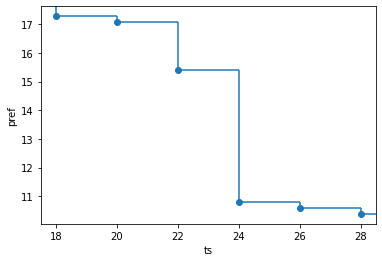

(array([[26.        , 10.5924496 ],
        [18.        , 17.27706132],
        [22.        , 15.40834081],
        [20.        , 17.06634029],
        [28.        , 10.38172856],
        [24.        , 10.80317063]]),
 {(26.0,
   10.59244959552648): <src.prism.strategy.DeterministicStrategy at 0x7fbd65e565b0>,
  (18.0,
   17.277061323194406): <src.prism.strategy.DeterministicStrategy at 0x7fbd649353d0>,
  (22.0,
   15.408340812830223): <src.prism.strategy.DeterministicStrategy at 0x7fbd64935dc0>,
  (20.0,
   17.066340291878753): <src.prism.strategy.DeterministicStrategy at 0x7fbd64935a00>,
  (28.0,
   10.381728564210828): <src.prism.strategy.DeterministicStrategy at 0x7fbd612c2d90>,
  (24.0,
   10.803170626842133): <src.prism.strategy.DeterministicStrategy at 0x7fbd65ab21f0>})

In [8]:
solver = MultiObjectiveSolver(game,
                            epsilon=1e-7,
                            max_iteration=300,
                            stochastic=stochastic,
                            adversarial=adversarial)
solver.solve(plot_strategies=plot_strategies,
                plot_graph_with_strategy=plot_graph_with_strategy,
                plot_graph_with_pareto=plot_graph_with_pareto,
                plot_pareto=plot_pareto,
                speedup=speedup,
                debug=debug,
                view=view,
                format=format)

----------------------------------------------------------------------------------------------------
Evaluate for a pareto point [26.        10.5924496]
----------------------------------------------------------------------------------------------------
Maximum Costs [18.         10.17100753]
Observation {('floor_green_open', 'floor_green_open', 'agent_blue_right'): 1}


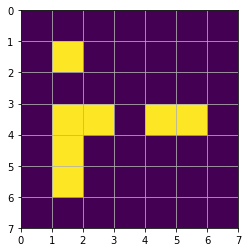

----------------------------------------------------------------------------------------------------
Evaluate for a pareto point [18.         17.27706132]
----------------------------------------------------------------------------------------------------
Maximum Costs [18.         17.27706132]
Observation {('agent_blue_right', 'agent_blue_right', 'agent_blue_right', 'agent_blue_right', 'floor_green_open'): 1}


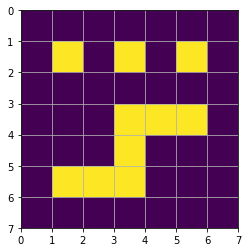

----------------------------------------------------------------------------------------------------
Evaluate for a pareto point [22.         15.40834081]
----------------------------------------------------------------------------------------------------
Maximum Costs [16.         14.77617772]
Observation {('floor_green_open', 'floor_green_open', 'agent_blue_right'): 1}


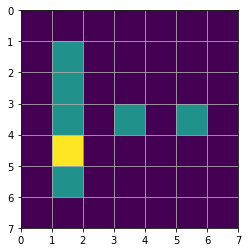

----------------------------------------------------------------------------------------------------
Evaluate for a pareto point [20.         17.06634029]
----------------------------------------------------------------------------------------------------
Maximum Costs [14.         12.67189114]
Observation {('agent_blue_right', 'agent_blue_right', 'floor_green_open'): 1}


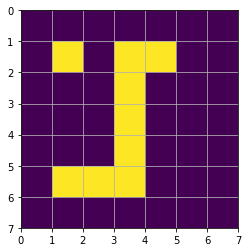

----------------------------------------------------------------------------------------------------
Evaluate for a pareto point [28.         10.38172856]
----------------------------------------------------------------------------------------------------
Maximum Costs [24.         10.17100753]
Observation {('floor_green_open', 'floor_green_open', 'agent_blue_right'): 1}


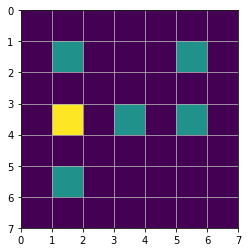

----------------------------------------------------------------------------------------------------
Evaluate for a pareto point [24.         10.80317063]
----------------------------------------------------------------------------------------------------
Maximum Costs [19.         10.38172856]
Observation {('floor_green_open', 'floor_green_open', 'agent_blue_right'): 1}


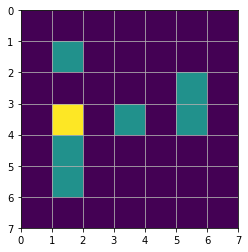

In [9]:
iterations = 100
iterations = 1

for pp in solver.get_pareto_points():
        strategy = solver.get_a_strategy_for(pp)

        print('-'*100)
        print(f"Evaluate for a pareto point {pp}")
        print('-'*100)

        sim = Simulator(env, game)
        sim.run(iterations=iterations,
                sys_strategy=strategy,
                render=False,
                record_video=iterations<=5)
        sim.get_stats()
        sim.plot_grid()

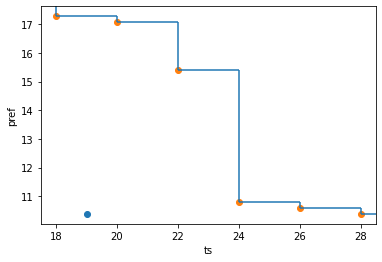

In [10]:
import matplotlib.pyplot as plt
costs = []
for result in sim._results:
    costs.append(result['Cost'])

costs = np.array(costs)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(costs[:, 0], costs[:, 1])

solver.plot_pareto_front(ax)

# Evaluation

In [11]:
# TODO: FIX THIS SHIT

player = 'sys'
SYS_ACTIONS = []
for multiactions in env.player_actions[player]:
    action_strings = []
    for agent, actions in zip(env.unwrapped.agents, multiactions):
        action_string = []
        for action in actions:
            if action is None or np.isnan(action):
                continue
            a_str = agent.ACTION_ENUM_TO_STR[action]
            action_string.append(a_str)
        action_strings.append(tuple(action_string))
    action_strs = action_strings[0] if player == 'sys' else action_strings[1:]
    SYS_ACTIONS.append(tuple(action_strs))

player = 'env'
ENV_ACTIONS = []
for multiactions in env.player_actions[player]:
    action_strings = []
    for agent, actions in zip(env.unwrapped.agents, multiactions):
        action_string = []
        for action in actions:
            if action is None or np.isnan(action):
                continue
            a_str = agent.ACTION_ENUM_TO_STR[action]
            action_string.append(a_str)
        action_strings.append(tuple(action_string))
    action_strs = action_strings[0] if player == 'sys' else action_strings[1:]
    ENV_ACTIONS.append(tuple(action_strs))

print(SYS_ACTIONS)
print(ENV_ACTIONS)

[('north',), ('south',), ('east',), ('west',), ('north', 'north'), ('north', 'south'), ('north', 'east'), ('north', 'west'), ('south', 'north'), ('south', 'south'), ('south', 'east'), ('south', 'west'), ('east', 'north'), ('east', 'south'), ('east', 'east'), ('east', 'west'), ('west', 'north'), ('west', 'south'), ('west', 'east'), ('west', 'west')]
[(('north',),), (('south',),), (('east',),), (('west',),)]


In [12]:
pp = solver.get_pareto_points()[0]
strategy = solver.get_a_strategy_for(pp)

sys_actions = [SYS_ACTIONS[9], 
               SYS_ACTIONS[9], 
               SYS_ACTIONS[14], 
               SYS_ACTIONS[4], 
               SYS_ACTIONS[14], 
               SYS_ACTIONS[4]]

env_actions = [ENV_ACTIONS[1], 
               ENV_ACTIONS[0], 
               ENV_ACTIONS[3], 
               ENV_ACTIONS[2], 
               ENV_ACTIONS[1], 
               ENV_ACTIONS[0]]

sim = Simulator(env, game)
sim.run_turn_based_game(
    sys_actions=sys_actions,
    env_actions=env_actions,
    render=False,
    record_video=True)
sim.get_stats()

Maximum Costs [24.         10.27636805]
Observation {('floor_green_open', 'floor_green_open', 'agent_blue_right'): 1}


2548 nodes and 16269 edges
1th Iteration took 5.33 seconds
2th Iteration took 13.88 seconds
3th Iteration took 16.66 seconds
4th Iteration took 20.38 seconds
5th Iteration took 25.75 seconds
6th Iteration took 22.20 seconds
7th Iteration took 19.84 seconds
Pareto Points Computation took 129.08 seconds


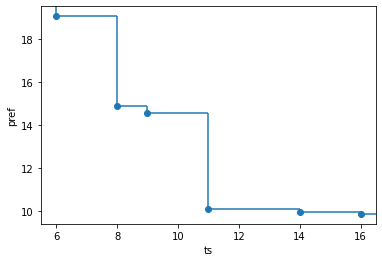

(array([[14.        ,  9.9602865 ],
        [ 9.        , 14.56545669],
        [11.        , 10.06564702],
        [ 8.        , 14.86911571],
        [16.        ,  9.85492599],
        [ 6.        , 19.06526636]]),
 {(14.0,
   9.960286501579523): <src.prism.strategy.DeterministicStrategy at 0x7fbd65e2f040>,
  (9.0,
   14.565456687567613): <src.prism.strategy.DeterministicStrategy at 0x7fbd65e2f340>,
  (11.0,
   10.06564701723735): <src.prism.strategy.DeterministicStrategy at 0x7fbd65e2fb20>,
  (8.0,
   14.869115714542534): <src.prism.strategy.DeterministicStrategy at 0x7fbd63de72e0>,
  (16.0,
   9.854925985921696): <src.prism.strategy.DeterministicStrategy at 0x7fbd612d72b0>,
  (6.0,
   19.06526635789788): <src.prism.strategy.DeterministicStrategy at 0x7fbd64293be0>})

In [13]:
adversarial = False

cooperative_solver = MultiObjectiveSolver(game,
                            epsilon=1e-7,
                            max_iteration=300,
                            stochastic=stochastic,
                            adversarial=adversarial)
cooperative_solver.solve(plot_strategies=plot_strategies,
                plot_graph_with_strategy=plot_graph_with_strategy,
                plot_graph_with_pareto=plot_graph_with_pareto,
                plot_pareto=plot_pareto,
                speedup=speedup,
                debug=debug,
                view=view,
                format=format)

In [14]:
iterations = 100
iterations = 2


for pp in cooperative_solver.get_pareto_points():
        strategy = cooperative_solver.get_a_strategy_for(pp)

        print('-'*100)
        print(f"Evaluate for a pareto point {pp}")
        print('-'*100)

        sim = Simulator(env, game)
        video_path = sim.run_turn_based_game(
                sys_strategy=strategy,
                render=False,
                record_video=True,
                adversarial=adversarial)
        print(video_path)
        print(sim.get_episodic_data())
        print(sim.get_stats())


----------------------------------------------------------------------------------------------------
Evaluate for a pareto point [14.         9.9602865]
----------------------------------------------------------------------------------------------------
/Users/kandai/Documents/projects/research/regret_synthesis_toolbox/examples/Fish_and_Shipwreck/minigrid_env_logs/openaigym.video.13.49043.video000012.mp4
{'Cost': array([14.       ,  9.9602865]), 'Observation': ['floor_green_open', 'floor_green_open', 'agent_blue_right'], 'SysActions': [('south', 'south'), ('south', 'south'), ('north',), ('north',), ('east', 'east')], 'EnvActions': [(('south',),), (('south',),), (('west',),), (('west',),)], 'SysPlay': array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 2., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])}
Maximum Costs [14.         9.